In [36]:
#-----------------------Laboratorio 08----------------------------
#Luiz Felipe Barros Alves
#Mat: 120110674

In [37]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [38]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [39]:
figsize(8,4)

In [40]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
lumapi = imp.load_source("lumapi", lumapiFile)
modeApi = lumapi.MODE(hide = False)

In [41]:
# units
um = 1e-6
nm = 1e-9

In [42]:
sub_material = 'SiO2 (Glass) - Palik'
core_material = 'Si (Silicon) - Palik'

gap = 200*nm

x_span_core =  450*nm
y_span_core =  200*nm
z_span_core =  1000*nm

x_core = (x_span_core+gap)/2
y_core = 0.0*um
z_core = 0.0*um


In [43]:
modeApi.addrect()
modeApi.set("name", "core_1")
modeApi.set("material", core_material)
modeApi.set("x", -x_core)
modeApi.set("x span", x_span_core)
modeApi.set("y", y_core)
modeApi.set("y span", y_span_core)
modeApi.set("z", z_core)
modeApi.set("z span", z_span_core)

modeApi.copy()
modeApi.set("name", "core_2")
modeApi.set("x", x_core)

In [44]:
# Definir material
fde_solve_material = sub_material

# Definir dimensões e outras características
x_fde = 0
x_span_fde = 4.0 * um
y_fde = 0
y_span_fde = 4.0 * um
z_fde = 0.0 * um
z_span_fde = 0.0 * um
mesh_cells = 100
wavelength = 1550 * nm
startWvg = 1550 * nm
stopWvg = 1550 * nm
modes = 4
mesh_multiplier = 4

fde_solve_material

'SiO2 (Glass) - Palik'

In [45]:
# Adicionar solver
modeApi.addfde()
modeApi.set("solver type", "2D Z normal")
modeApi.set("background material", fde_solve_material)

modeApi.set("x", x_fde)
modeApi.set("x span", x_span_fde)
modeApi.set("y", y_fde)
modeApi.set("y span", y_span_fde)
modeApi.set("z", z_fde)
#modeApi.set("z span", 0.0)

modeApi.set("define x mesh by", "number of mesh cells")
modeApi.set("define y mesh by", "number of mesh cells")
modeApi.set("mesh cells x", mesh_cells)
modeApi.set("mesh cells y", mesh_cells)

modeApi.set("wavelength", wavelength)
modeApi.set("number of trial modes", modes)

modeApi.set("fit materials with multi-coefficient model", True)
modeApi.set("wavelength start", startWvg)
modeApi.set("wavelength stop", stopWvg)

modeApi.set("x min bc", "PML")
modeApi.set("x max bc", "PML")
modeApi.set("y min bc", "PML")
modeApi.set("y max bc", "PML")
#modeApi.set("z min bc", "PML")
#modeApi.set("z max bc", "PML")

# Add mesh
modeApi.addmesh()
modeApi.set('set mesh multiplier', True)
modeApi.set('x', x_fde)
modeApi.set('x span', 0.35*x_span_fde)
modeApi.set('x mesh multiplier', mesh_multiplier)
modeApi.set('y', y_fde)
modeApi.set('y span', 0.15*y_span_fde)
modeApi.set('y mesh multiplier', mesh_multiplier)
modeApi.set('z span', 0)

In [47]:
nmbOFModes = int(modeApi.findmodes())
print(modeApi.getresult('FDE::data::mode1'))

E
H
P
farfield
surface_normal
dimension
f
neff
ng
loss
TE polarization fraction
waveguide TE/TM fraction
mode effective area
x
y
z
Ex
Ey
Ez
Hx
Hy
Hz
Z0


In [62]:
eField = np.squeeze(modeApi.getresult("FDE::data::mode1", "Ex"))
x_efield = modeApi.getresult('FDE::data::mode1', 'x')/um
y_efield = modeApi.getresult('FDE::data::mode1', 'y')/um

rfIndex = np.squeeze(modeApi.getdata('FDE::data::material', 'index_y'))


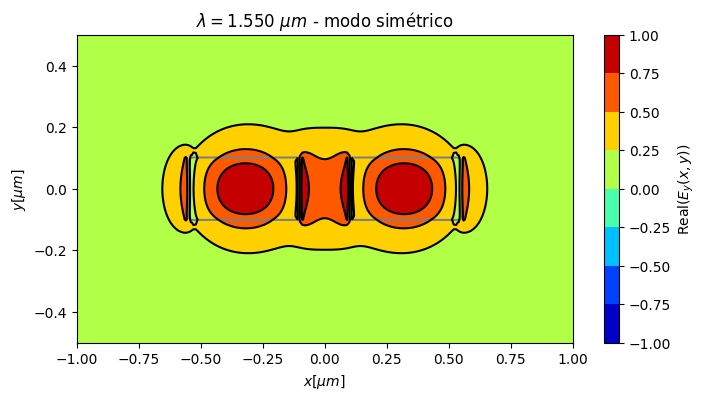

In [71]:
v = np.linspace(-1, 1, 9, endpoint=True)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
X, Y = np.meshgrid(x_efield, y_efield)

plt.contour(X, Y, np.rot90(rfIndex.real), 0, colors='gray', origin='upper')
plt.contour(X, Y, np.rot90(eField.real), v, colors='k', vmin=-1, vmax=1)
im = plt.contourf(X, Y, np.rot90(eField.real), v, cmap=plt.cm.jet, vmin=-1, vmax=1)

colorbar = plt.colorbar(im)
colorbar.set_ticks(v)
colorbar.set_label(r'Real($E_{y}(x,y))$')

plt.xlabel(r'$x [\mu m]$')
plt.ylabel(r'$y [\mu m]$')
plt.title(r'$\lambda = %.3f \ \mu m$ - modo simétrico'%(1e6*wavelength))
#plt.axis('equal')
plt.xlim([-1, 1])
plt.ylim([-0.5, 0.5])

plt.savefig('dc_mode_1.png')
plt.show()


In [73]:
eField = np.squeeze(modeApi.getresult("FDE::data::mode2", "Ex"))
x_efield = modeApi.getresult('FDE::data::mode2', 'x')/um
y_efield = modeApi.getresult('FDE::data::mode2', 'y')/um

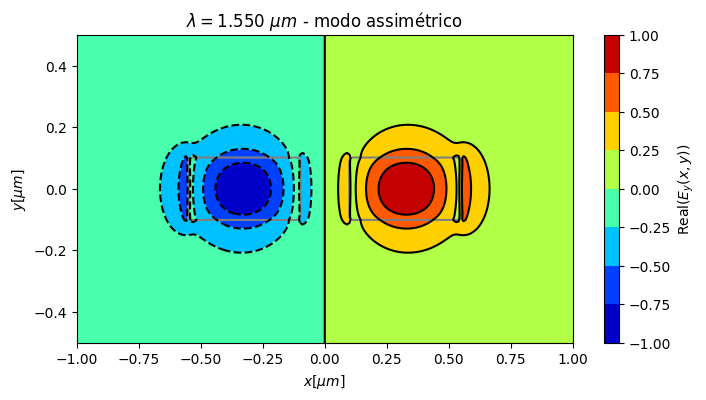

In [75]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
X, Y = np.meshgrid(x_efield, y_efield)

plt.contour(X, Y, np.rot90(rfIndex.real), 0, colors='gray', origin='upper')
plt.contour(X, Y, np.rot90(eField.real), v, colors='k', vmin=-1, vmax=1)
im = plt.contourf(X, Y, np.rot90(eField.real), v, cmap=plt.cm.jet, vmin=-1, vmax=1)

colorbar = plt.colorbar(im)
colorbar.set_ticks(v)
colorbar.set_label(r'Real($E_{y}(x,y))$')

plt.xlabel(r'$x [\mu m]$')
plt.ylabel(r'$y [\mu m]$')
plt.title(r'$\lambda = %.3f \ \mu m$ - modo assimétrico'%(1e6*wavelength))

# plt.axis('equal')  # Mantém a proporção igual no gráfico, mas está comentado
plt.xlim([-1, 1])
plt.ylim([-0.5, 0.5])

plt.savefig('dc_mode_2.png')
plt.show()


In [77]:
n1 = modeApi.getresult('FDE::data::mode1', 'neff')
n2 = modeApi.getresult('FDE::data::mode2', 'neff')
L_x = wavelength/(2*np.abs(n1.real - n2.real))
L_x

array([[2.07197831e-05]])

## Progate

In [87]:
# First, delete the right waveguide
modeApi.switchtolayout()
modeApi.select("core_2")
modeApi.set("enabled", 0)

# Find modes of the single waveguide
modeApi.findmodes()
modeApi.cleardcard()
modeApi.copydcard("mode1", "mode_1")

# Find the modes of the couple device
modeApi.switchtolayout()
modeApi.select("core_2")
modeApi.set("enabled", 1)
modeApi.findmodes()

# Choose vector of L
numPtsL = 100
L_max = 40*um
L = modeApi.linspace(0, L_max, numPtsL)
x = np.squeeze(modeApi.getdata("mode_1", "x"))
z = np.squeeze(modeApi.getdata("mode_1", "z"))
len_y = len(np.squeeze(modeApi.getdata("mode_1", "y")))
nmin = 2
nmax = 4

e_field = np.zeros((len(x), numPtsL))

# Loop over all lengths and use propagate command
for i in range(numPtsL):
    outmode = modeApi.propagate('mode_1', L[i], nmin, nmax)
    e_field_temp =modeApi.getelectric(outmode)
    modeApi.cleardcard(outmode)
    e_field[:,i] = np.squeeze(e_field_temp[:, len_y // 2])

C:\Users\alves\AppData\Local\Temp\ipykernel_6616\987941928.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(r'%4.3f $\mu$m - %4.3f um' % (wavelength/um, L_x/um))


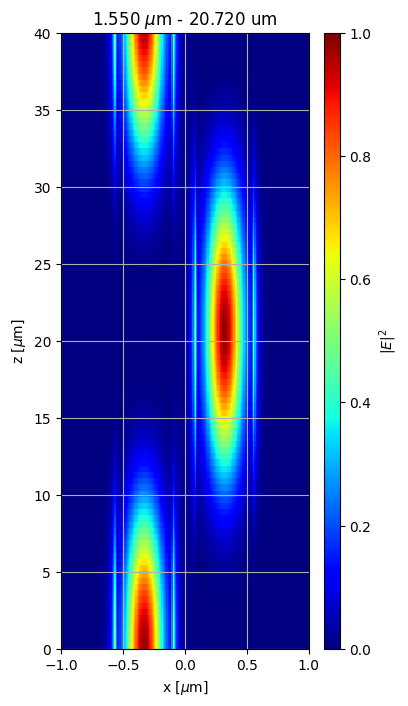

In [88]:
# v = np.linspace(0, 1, 9, endpoint=True)

fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(111)

# Gera a malha de campo elétrico
Z, X = np.meshgrid(L/um, x/um)

# Plota os dados
im = ax.pcolor(X, Z, np.abs(e_field)**2, cmap=plt.cm.jet, vmin=0, vmax=1)

# Adiciona barra de cores
colorbar = plt.colorbar(im, aspect=40)
colorbar.set_label(r'$|E|^2$')

# Define os rótulos dos eixos
plt.xlabel(r'x [$\mu$m]')
plt.ylabel(r'z [$\mu$m]')

# Define o título do gráfico
plt.title(r'%4.3f $\mu$m - %4.3f um' % (wavelength/um, L_x/um))

# Define os limites dos eixos
plt.xlim([-1,1])
plt.ylim([0,L_max/um])
plt.grid()

plt.savefig('propagate.png', bbox_inches='tight')
plt.show()


## Comprimento de acoplamento em função do gap entre guias

In [91]:
modeApi.switchtolayout()
modeApi.cleardcard()

In [92]:
modeApi.select('mesh')
mesh_multiplier = 10
modeApi.set('x mesh multiplier', mesh_multiplier)
modeApi.set('y mesh multiplier', mesh_multiplier)

In [95]:
gap = np.linspace(50*nm, 1000*nm, 20)
delta_n = np.zeros(len(gap))

for i in range(len(gap)):
    modeApi.switchtolayout()
    modeApi.select("core_1")
    modeApi.set("x", -(gap[i] + x_span_core) / 2)
    modeApi.select("core_2")
    modeApi.set("x", (gap[i] + x_span_core) / 2)
    modeApi.select("mesh")
    modeApi.set("x span", 1.1 * (2 * x_span_core + gap[i]))

    if (gap[i] > 200 * nm):
        mesh_multiplier = 4
        modeApi.set("x mesh multiplier", mesh_multiplier)
        modeApi.set("y mesh multiplier", mesh_multiplier)

    modeApi.findmodes()

    n1 = modeApi.getresult("FDE::data::mode1", "neff")
    n2 = modeApi.getresult("FDE::data::mode2", "neff")
    delta_n[i] = np.abs(n1.real - n2.real)


C:\Users\alves\AppData\Local\Temp\ipykernel_6616\2960513021.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_n[i] = np.abs(n1.real - n2.real)


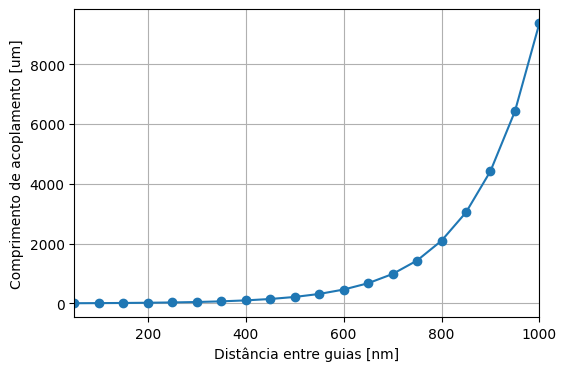

In [96]:
Lx = wavelength / (2 * delta_n)
fig = plt.figure(figsize=(6, 4))
plt.plot(gap / nm, Lx / um, 'o-')
plt.xlabel('Distância entre guias [nm]')
plt.ylabel('Comprimento de acoplamento [um]')
plt.xlim([gap[0] / nm, gap[-1] / nm])
plt.grid()
plt.savefig('cross_versus_gap_linear.png', bbox_inches='tight')
plt.show()


[5.13367647 0.00750949]


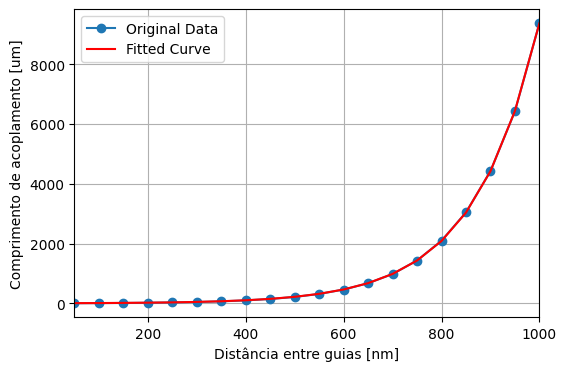

In [97]:
from scipy import optimize

def func(x, a, b):
    return a * np.exp(b * x)

popt, pcov = optimize.curve_fit(func, gap/nm, Lx/um, p0=(3.54, 0.008))

print(popt)

fig = plt.figure(figsize=(6, 4))
plt.plot(gap/nm, Lx/um, 'o-', label="Original Data")
plt.plot(gap/nm, func(gap/nm, *popt), 'r-', label="Fitted Curve")
plt.xlabel('Distância entre guias [nm]')
plt.ylabel('Comprimento de acoplamento [um]')
plt.xlim([gap[0]/nm, gap[-1]/nm])
plt.grid()
plt.legend()
plt.savefig('cross_versus_gap_linear_fitted.png', bbox_inches='tight')
plt.show()


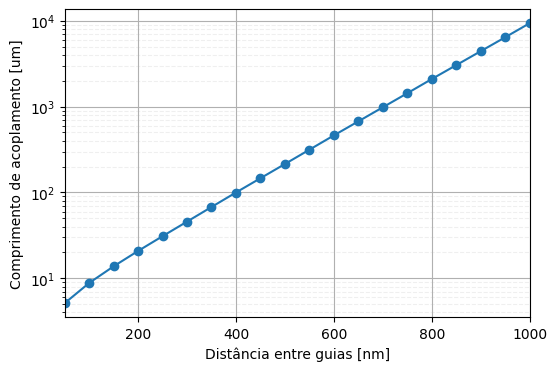

In [101]:
fig = plt.figure(figsize=(6, 4))

plt.semilogy(gap/nm, Lx/um, 'o-')

plt.xlabel('Distância entre guias [nm]')
plt.ylabel('Comprimento de acoplamento [um]')
plt.xlim([gap[0]/nm, gap[-1]/nm])
plt.grid(which='major')
plt.grid(which='minor', linestyle='--', alpha=0.2)

plt.savefig('cross_versus_gap_log.png', bbox_inches='tight')
plt.show()


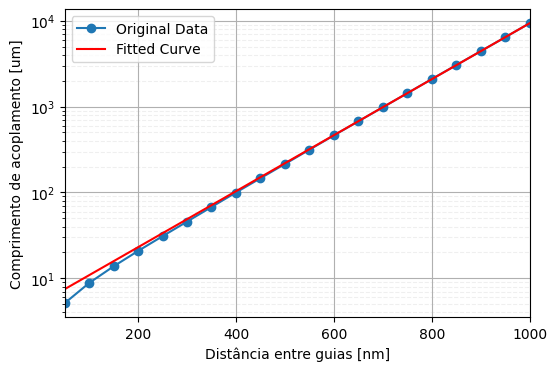

In [102]:
fig = plt.figure(figsize=(6, 4))

plt.semilogy(gap/nm, Lx/um, 'o-', label="Original Data")
plt.semilogy(gap/nm, func(gap/nm, *popt), 'r-', label="Fitted Curve")

plt.xlabel('Distância entre guias [nm]')
plt.ylabel('Comprimento de acoplamento [um]')
plt.xlim([gap[0]/nm, gap[-1]/nm])
plt.grid(which='major')
plt.grid(which='minor', linestyle='--', alpha=0.2)
plt.legend()

plt.savefig('cross_versus_gap_log_fitted.png', bbox_inches='tight')
plt.show()


## Acoplamento de campo em função do gap e comprimento de acoplamento

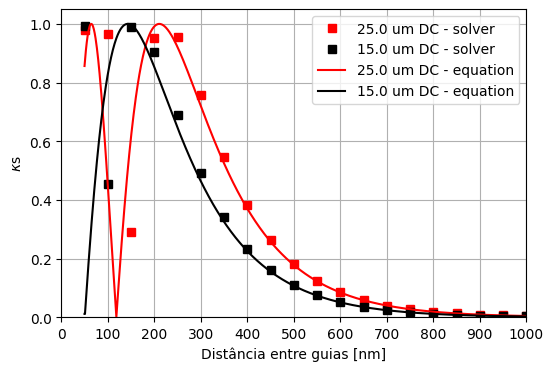

In [103]:
z1 = 25 * um
z2 = 15 * um

kappa1 = np.sin(np.pi / 2 * z1 / Lx)
kappa2 = np.sin(np.pi / 2 * z2 / Lx)

gap_fit = np.linspace(50, 1000, 1000)
kappa1_fit = np.sin(np.pi / 2 * z1 / func(gap_fit, *popt) / um)
kappa2_fit = np.sin(np.pi / 2 * z2 / func(gap_fit, *popt) / um)

fig = plt.figure(figsize=(6, 4))
plt.plot(gap/nm, np.abs(kappa1), 'rs', label='%.1f um DC - solver' % (z1 / um))
plt.plot(gap/nm, np.abs(kappa2), 'ks', label='%.1f um DC - solver' % (z2 / um))
plt.plot(gap_fit, np.abs(kappa1_fit), 'r-', label='%.1f um DC - equation' % (z1 / um))
plt.plot(gap_fit, np.abs(kappa2_fit), 'k-', label='%.1f um DC - equation' % (z2 / um))

plt.xlabel('Distância entre guias [nm]')
plt.xticks(range(0, 1100, 100))
plt.ylabel('$\kappa$s')
plt.xlim([0, 1000])
plt.ylim([0, 1.05])
plt.grid()
plt.legend()

plt.savefig('kappa_versus_gap.png', bbox_inches='tight')
plt.show()


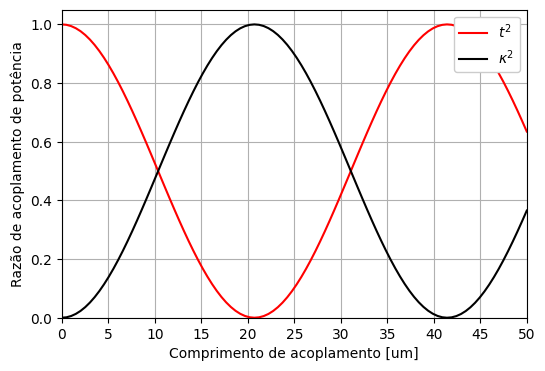

In [104]:
lenDC = np.linspace(0, 50 * um, 100)
tSqr = np.squeeze((np.cos(np.pi / 2 * lenDC / L_x))**2)
kappaSqr = np.squeeze((np.sin(np.pi / 2 * lenDC / L_x))**2)

fig = plt.figure(figsize=(6, 4))
plt.plot(lenDC / um, tSqr, 'r-', label='$t^2$')
plt.plot(lenDC / um, kappaSqr, 'k-', label='$\kappa^2$')

plt.xlabel('Comprimento de acoplamento [um]')
plt.xticks(range(0, 55, 5))
plt.ylabel('Razão de acoplamento de potência')
plt.xlim([0, 50])
plt.ylim([0, 1.05])
plt.grid()
plt.legend(loc=1, framealpha=1)

plt.savefig('kappa2_versus_gap.png', bbox_inches='tight')
plt.show()


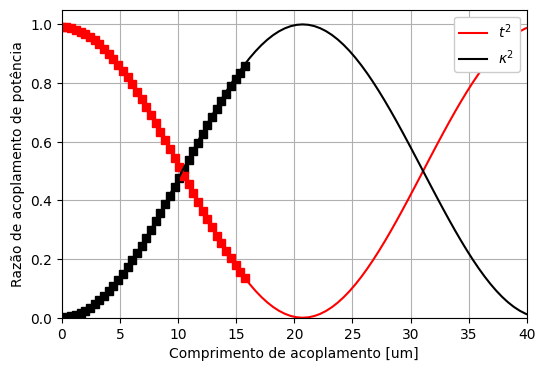

In [105]:
index_core_1 = np.argmin(np.abs(np.array(x) - x_core))
index_core_2 = np.argmin(np.abs(np.array(x) + x_core))

fig = plt.figure(figsize=(6, 4))
plt.plot(L[:40] / um, e_field[index_core_1, :40], 'sk')
plt.plot(L[:40] / um, e_field[index_core_2, :40], 'sr')
plt.plot(lenDC / um, tSqr, 'r-', label='$t^2$')
plt.plot(lenDC / um, kappaSqr, 'k-', label='$\kappa^2$')

plt.xlabel('Comprimento de acoplamento [um]')
plt.xticks(range(0, 55, 5))
plt.ylabel('Razão de acoplamento de potência')
plt.xlim([0, 40])
plt.ylim([0, 1.05])
plt.grid()
plt.legend(loc=1, framealpha=1)

plt.savefig('kappa2_versus_gap_data.png', bbox_inches='tight')
plt.show()


## Variação em função do comprimento de onda

In [106]:
wvls = np.array([1530 * nm, 1570 * nm])
gap = np.linspace(150 * nm, 500 * nm, 8)
delta_n = np.zeros((len(gap), len(wvls)))

mesh_multiplier = 8
modeApi.switchtolayout()
modeApi.select("mesh")
modeApi.set("x mesh multiplier", mesh_multiplier)
modeApi.set("y mesh multiplier", mesh_multiplier)

for j in range(len(wvls)):
    modeApi.switchtolayout()
    modeApi.select("FDE")
    modeApi.set("wavelength", wvls[j])
    
    for i in range(len(gap)):
        modeApi.switchtolayout()
        modeApi.select("core_1")
        modeApi.set("x", -(gap[i] + x_span_core) / 2)
        modeApi.select("core_2")
        modeApi.set("x", (gap[i] + x_span_core) / 2)
        modeApi.select("mesh")
        modeApi.set("x span", 1.1 * (2 * x_span_core + gap[i]))
        modeApi.findmodes()
        
        n1 = modeApi.getresult("FDE::data::mode1", "neff")
        n2 = modeApi.getresult("FDE::data::mode2", "neff")
        delta_n[i, j] = np.abs(n1.real - n2.real)


C:\Users\alves\AppData\Local\Temp\ipykernel_6616\622391634.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_n[i, j] = np.abs(n1.real - n2.real)


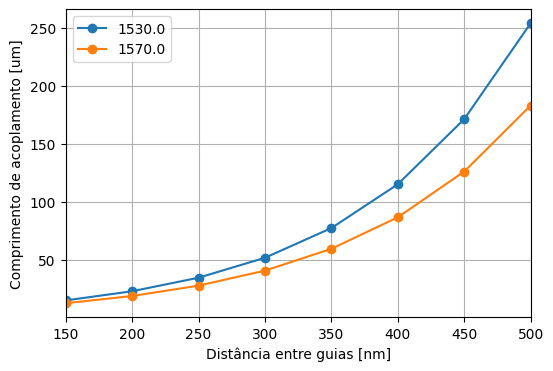

In [107]:
Lx_1530_nm = wavelength / (2 * delta_n[:, 0])
Lx_1570_nm = wavelength / (2 * delta_n[:, 1])

fig = plt.figure(figsize=(6, 4))
plt.plot(gap / nm, Lx_1530_nm / um, 'o-', label='%.1f' % (wvls[0] / nm))
plt.plot(gap / nm, Lx_1570_nm / um, 'o-', label='%.1f' % (wvls[1] / nm))

plt.xlabel('Distância entre guias [nm]')
plt.ylabel('Comprimento de acoplamento [um]')
plt.xlim([gap[0] / nm, gap[-1] / nm])
plt.grid()
plt.legend()

plt.savefig('cross_versus_gap_wavelength.png', bbox_inches='tight')
plt.show()


In [108]:
modeApi.close()